# Universidade Federal do Rio Grande do Norte
# Instituto Metrópole Digital
# Docente: Ivanovitch Silva
# Discente: Rafael Costa Varela

# Visualização gráfica de dados

Neste notebook, construiremos alguns gráficos a partir de dados das eleições presidenciais de 2018.

# Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados

In [4]:
def load_csv(csv_file):
    return pd.read_csv(csv_file, sep=";", encoding="ISO-8859-1")

votacao_br = load_csv('votacao_candidato_munzona_2018_BR.csv')
votacao_rn = load_csv('votacao_candidato_munzona_2018_RN.csv')

# Visualização inicial dos dados

In [8]:
votacao_br.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
0,13/10/2018,19:42:23,2018,2,Eleição Ordinária,1,295,ELEIÇÃO GERAL FEDERAL 2018,07/10/2018,F,...,50,PSOL,Partido Socialismo e Liberdade,280000050035,VAMOS SEM MEDO DE MUDAR O BRASIL,PSOL / PCB,4,NÃO ELEITO,N,10
1,13/10/2018,19:42:23,2018,2,Eleição Ordinária,1,295,ELEIÇÃO GERAL FEDERAL 2018,07/10/2018,F,...,51,PATRI,Patriota,280000050072,PARTIDO ISOLADO,PATRI,4,NÃO ELEITO,N,33
2,13/10/2018,19:42:23,2018,2,Eleição Ordinária,1,295,ELEIÇÃO GERAL FEDERAL 2018,07/10/2018,F,...,18,REDE,Rede Sustentabilidade,280000050589,UNIDOS PARA TRANSFORMAR O BRASIL,REDE / PV,4,NÃO ELEITO,N,691
3,13/10/2018,19:42:23,2018,2,Eleição Ordinária,1,295,ELEIÇÃO GERAL FEDERAL 2018,07/10/2018,F,...,18,REDE,Rede Sustentabilidade,280000050589,UNIDOS PARA TRANSFORMAR O BRASIL,REDE / PV,4,NÃO ELEITO,N,5
4,13/10/2018,19:42:23,2018,2,Eleição Ordinária,1,295,ELEIÇÃO GERAL FEDERAL 2018,07/10/2018,F,...,45,PSDB,Partido da Social Democracia Brasileira,280000050070,PARA UNIR O BRASIL,PSDB / PTB / PP / PR / DEM / SOLIDARIEDADE / P...,4,NÃO ELEITO,N,1346


In [6]:
votacao_rn.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS
0,13/10/2018,19:37:56,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,15,MDB,Movimento Democrático Brasileiro,200000050285,100% RN,PDT / PP / MDB / PODE / DEM,4,NÃO ELEITO,N,863
1,13/10/2018,19:37:56,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,25,DEM,Democratas,200000050360,100% RN II,PDT / PP / MDB / PODE / DEM,5,SUPLENTE,N,0
2,13/10/2018,19:37:56,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,70,AVANTE,AVANTE,200000050107,TRABALHO E SUPERAÇÃO III,PRB / AVANTE,5,SUPLENTE,N,0
3,13/10/2018,19:37:56,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,20,PSC,Partido Social Cristão,200000050084,RENOVA RN III,PATRI / PSL / PSC / DC / PPL,5,SUPLENTE,N,0
4,13/10/2018,19:37:56,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,77,SOLIDARIEDADE,Solidariedade,200000050024,RENOVA RN I,SOLIDARIEDADE / PSL / DC / PV / PSC,5,SUPLENTE,N,4


Uma primeira pergunta que se pode fazer é: Quantos municípios de cada estado estão representados nestes dados? A resposta segue no gráfico a seguir:

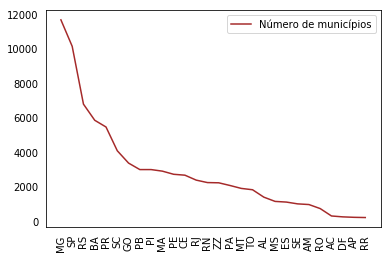

In [48]:
%matplotlib inline
plt.plot(votacao_br['SG_UF'].value_counts(), c='brown', label='Número de municípios')
plt.tick_params(bottom='off', top='off', left='off', right='off')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.legend(loc='upper right')

#### Gráfico 1: distribuição de municípios por estado

Existe uma crença popular de que o estado de Minas Gerais é decisivo em resultados de eleições. Um primeiro indicativo pode ser visto acima: é o estado com mais municípios.